In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df= sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df= df[['sepal_length', 'petal_length', 'species']]
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['species']= encoder.fit_transform(df['species'])
X= df.iloc[:,0:-1]
y= df.iloc[:,-1]

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2, random_state= 20)

In [5]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(multi_class= 'multinomial') 

In [6]:
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)
print(accuracy_score(y_test,y_pred)*100,'%')

print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

96.66666666666667 %
   0   1   2
0  8   0   0
1  0  10   1
2  0   0  11 



In [7]:
query= np.array([[3.4,2.7]])
clf.predict_proba(query)       #will get the probability of 03 classes by predict_prob

C:\Users\shubh\anaconda3\envs\env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[8.58291888e-01, 1.41505432e-01, 2.02679872e-04]])

In [8]:
clf.predict(query)

C:\Users\shubh\anaconda3\envs\env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [9]:
df['species'].unique()

array([0, 1, 2])

C:\Users\shubh\anaconda3\envs\env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


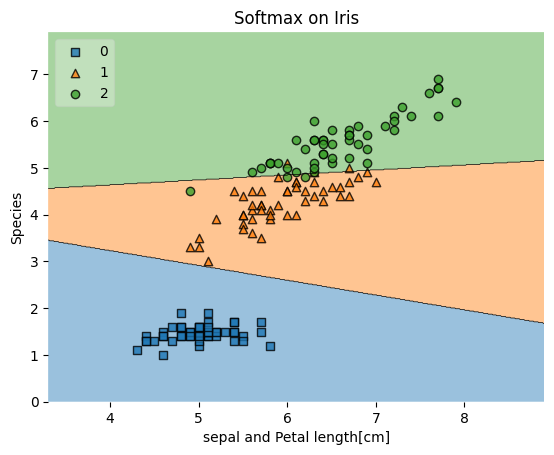

In [12]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

plt.xlabel('sepal and Petal length[cm]')
plt.ylabel('Species')
plt.title('Softmax on Iris')

plt.show()